### Ready! - 학습 데이터 준비하고 전처리하기

### 01 데이터 준비하기


In [ ]:
weather_FrogSound1 = [70, 60, 90, 80, 50, 80, 90, 70, 80, 100,
                     40, 30, 60, 20, 50, 0, 0, 0, 0, 0]
weather_KneePain1 = [44, 39, 49, 36, 48, 29, 39, 43, 41, 44,
                    38, 44, 49, 39, 48, 42, 47, 42, 38, 36]

: 

In [1]:
import matplotlib.pyplot as plt

plt.scatter(weather_FrogSound1, weather_KneePain1)
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
weather_FrogSound0 = [0, 0, 5, 10, 30, 20, 52, 38, 35, 40,
                     20, 10, 0, 10, 0, 0, 0, 0, 0, 0]
weather_KneePain0 = [20, 21, 16, 25, 18, 11, 6, 13, 21, 18,
                     21, 16, 6, 19, 13, 22, 31, 27, 24, 26]

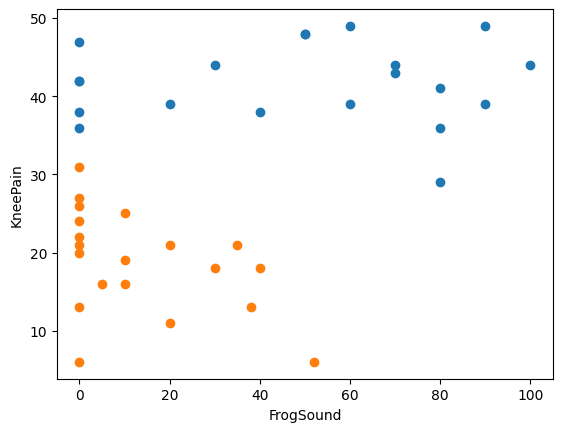

In [4]:
import matplotlib.pyplot as plt

plt.scatter(weather_FrogSound1, weather_KneePain1)
plt.scatter(weather_FrogSound0, weather_KneePain0)
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

In [5]:
FrogSound = weather_FrogSound1 + weather_FrogSound0
KneePain = weather_KneePain1 + weather_KneePain0

In [6]:
import numpy as np

weather_data = np.column_stack((FrogSound, KneePain))
print(weather_data)

[[ 70  44]
 [ 60  39]
 [ 90  49]
 [ 80  36]
 [ 50  48]
 [ 80  29]
 [ 90  39]
 [ 70  43]
 [ 80  41]
 [100  44]
 [ 40  38]
 [ 30  44]
 [ 60  49]
 [ 20  39]
 [ 50  48]
 [  0  42]
 [  0  47]
 [  0  42]
 [  0  38]
 [  0  36]
 [  0  20]
 [  0  21]
 [  5  16]
 [ 10  25]
 [ 30  18]
 [ 20  11]
 [ 52   6]
 [ 38  13]
 [ 35  21]
 [ 40  18]
 [ 20  21]
 [ 10  16]
 [  0   6]
 [ 10  19]
 [  0  13]
 [  0  22]
 [  0  31]
 [  0  27]
 [  0  24]
 [  0  26]]


In [7]:
weather_target = np.concatenate((np.ones(20), np.zeros(20)))
print(weather_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 02 - 데이터 전처리하기


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    weather_data, weather_target, random_state=7)
print(test_target)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]


In [10]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(30, 2) (10, 2)
(30,) (10,)


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

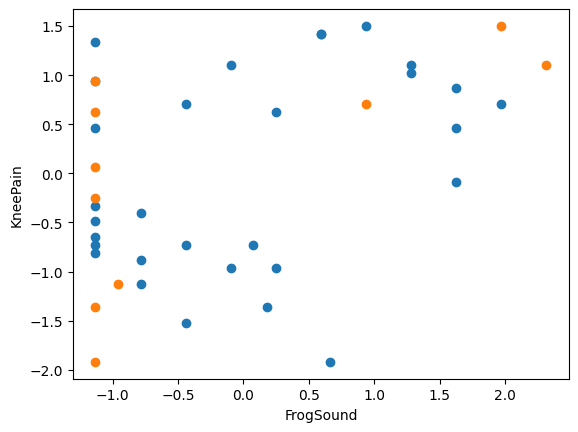

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(test_scaled[:,0], test_scaled[:,1])
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

### Make! - 개구리 울음 소리와 무릎 통증 데이터로 인공지능 모델 만들기


### 01 - k-최근접 이웃 모델 만들기


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [14]:
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

1.0
1.0


### Predict! - 개구리 울음 소리와 무릎 통증으로 내일 날씨 예측하기


### 01 - k-최근접 이웃으로 날씨 예측하기


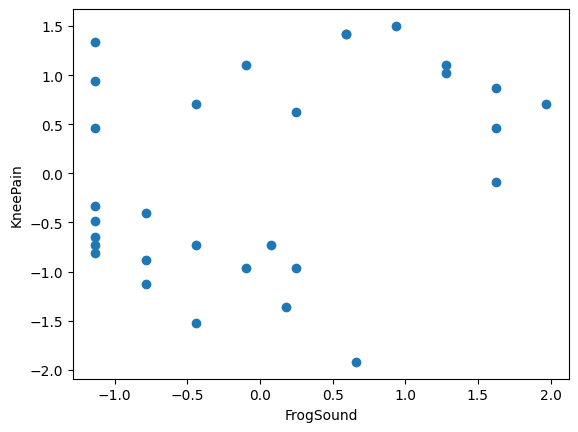

In [15]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0], train_scaled[:,1])
#plt.scatter(test_scaled[:,0], test_scaled[:,1])
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

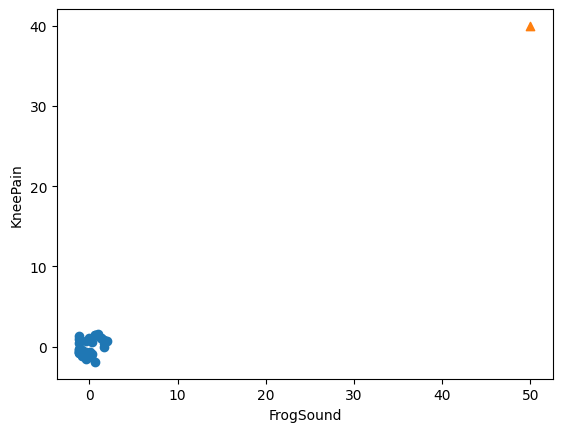

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
#plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.scatter(50, 40, marker='^')
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

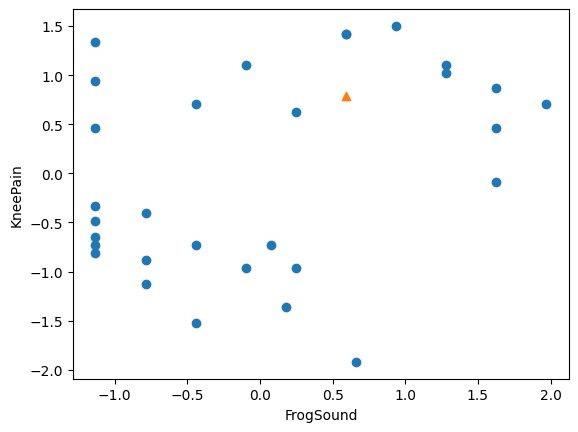

In [17]:
import matplotlib.pyplot as plt

mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis =0)
n_tg = ([50,40] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(n_tg[0], n_tg[1], marker='^')
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

In [18]:
distances, indexes = knn.kneighbors([[n_tg[0], n_tg[1]]])

print(distances)

[[0.37977078 0.63661597 0.63661597 0.72977798 0.75954157]]


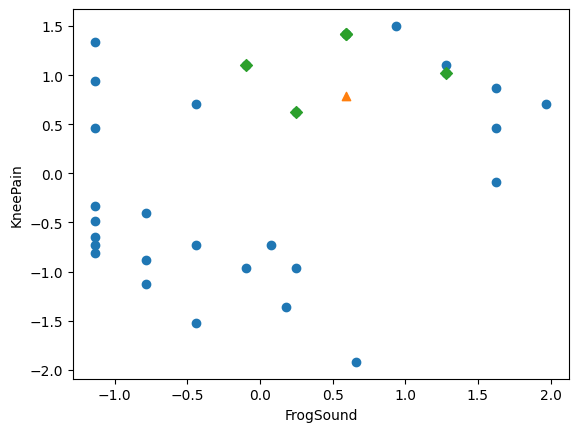

In [19]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(n_tg[0], n_tg[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('FrogSound')
plt.ylabel('KneePain')
plt.show()

In [20]:
print(knn.predict([n_tg]))

[1.]
